[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hrdod\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



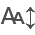

In [2]:
import pandas as pd
import numpy as np
import nltk
import re

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

In [3]:
df = pd.read_csv("c1.csv")
df.head()

Index Episode_Num                                  Episode_Name Arc_Num  \
0    1.0          E1   Campaign 1 Episode 1 Arrival at Kraghammer       A1   
1    2.0          E1   Campaign 1 Episode 1 Arrival at Kraghammer       A1   
2    3.0          E1   Campaign 1 Episode 1 Arrival at Kraghammer       A1   
3    4.0          E1   Campaign 1 Episode 1 Arrival at Kraghammer       A1   
4    5.0          E1   Campaign 1 Episode 1 Arrival at Kraghammer       A1   

                           Arc_Name Speaker  \
0  Arc 1: Kraghammer and Vasselheim    MATT   
1  Arc 1: Kraghammer and Vasselheim    MATT   
2  Arc 1: Kraghammer and Vasselheim    MATT   
3  Arc 1: Kraghammer and Vasselheim    MATT   
4  Arc 1: Kraghammer and Vasselheim  TRAVIS   

                                                Line  
0  Hello everyone. My name is Matthew Mercer, voi...  
1  Please come watch us live if you have the oppo...  
2  Welcome to first episode of Critical Role, and...  
3  Nevertheless, we have some background story on...  
4  Right, listen up! If you have ale, then you ha...

In [5]:
def remove_arrows(line):
    
    line = re.sub(u'\u2192', '', line)

    return line

df.Line = df.Line.apply(remove_arrows)
df.head()

Index Episode_Num                                  Episode_Name Arc_Num  \
0    1.0          E1   Campaign 1 Episode 1 Arrival at Kraghammer       A1   
1    2.0          E1   Campaign 1 Episode 1 Arrival at Kraghammer       A1   
2    3.0          E1   Campaign 1 Episode 1 Arrival at Kraghammer       A1   
3    4.0          E1   Campaign 1 Episode 1 Arrival at Kraghammer       A1   
4    5.0          E1   Campaign 1 Episode 1 Arrival at Kraghammer       A1   

                           Arc_Name Speaker  \
0  Arc 1: Kraghammer and Vasselheim    MATT   
1  Arc 1: Kraghammer and Vasselheim    MATT   
2  Arc 1: Kraghammer and Vasselheim    MATT   
3  Arc 1: Kraghammer and Vasselheim    MATT   
4  Arc 1: Kraghammer and Vasselheim  TRAVIS   

                                                Line  
0  Hello everyone. My name is Matthew Mercer, voi...  
1  Please come watch us live if you have the oppo...  
2  Welcome to first episode of Critical Role, and...  
3  Nevertheless, we have some background story on...  
4  Right, listen up! If you have ale, then you ha...

In [7]:
df.value_counts("Speaker")

Speaker
MATT                 95320
LAURA                43258
MARISHA              32847
SAM                  32219
TRAVIS               29345
                     ...  
JORE                     1
IPHONE                   1
EMPLOYEE                 1
COMPUTERGENERATED        1
time                     1
Name: count, Length: 80, dtype: int64

In [8]:
df.value_counts("Episode_Num")

Episode_Num
E88     6140
E10     5248
E4      5131
E11     4531
E58     4488
        ... 
E20     1606
E69     1604
E36     1565
E109    1501
E104    1250
Name: count, Length: 114, dtype: int64

In [10]:
analyzer = SentimentIntensityAnalyzer()

df['Sentiment'] = df.Line.map(lambda text: analyzer.polarity_scores(text)["compound"])

df.head()

Index Episode_Num                                  Episode_Name Arc_Num  \
0    1.0          E1   Campaign 1 Episode 1 Arrival at Kraghammer       A1   
1    2.0          E1   Campaign 1 Episode 1 Arrival at Kraghammer       A1   
2    3.0          E1   Campaign 1 Episode 1 Arrival at Kraghammer       A1   
3    4.0          E1   Campaign 1 Episode 1 Arrival at Kraghammer       A1   
4    5.0          E1   Campaign 1 Episode 1 Arrival at Kraghammer       A1   

                           Arc_Name Speaker  \
0  Arc 1: Kraghammer and Vasselheim    MATT   
1  Arc 1: Kraghammer and Vasselheim    MATT   
2  Arc 1: Kraghammer and Vasselheim    MATT   
3  Arc 1: Kraghammer and Vasselheim    MATT   
4  Arc 1: Kraghammer and Vasselheim  TRAVIS   

                                                Line  Sentiment  
0  Hello everyone. My name is Matthew Mercer, voi...     0.4215  
1  Please come watch us live if you have the oppo...     0.7777  
2  Welcome to first episode of Critical Role, and...     0.9345  
3  Nevertheless, we have some background story on...     0.8680  
4  Right, listen up! If you have ale, then you ha...     0.8879

In [12]:
df_group = df.groupby('Speaker')["Sentiment"].describe()
df_cast = df_group.query('Speaker == "MATT" or Speaker == "MARISHA" or Speaker == "LAURA" or Speaker == "TRAVIS" or Speaker == "SAM" or Speaker == "LIAM" or Speaker == "TALIESIN" or Speaker == "ASHLEY" or Speaker == "ORION"')
df_cast.sort_values(by="mean")

count      mean       std     min  25%  50%     75%     max
Speaker                                                                
LIAM      27664.0  0.049217  0.322004 -0.9788  0.0  0.0  0.2500  0.9871
TRAVIS    29345.0  0.049255  0.327902 -0.9732  0.0  0.0  0.2960  0.9941
TALIESIN  29139.0  0.052045  0.330389 -0.9933  0.0  0.0  0.2732  0.9847
LAURA     43258.0  0.055153  0.325983 -0.9630  0.0  0.0  0.2740  0.9859
SAM       32219.0  0.063001  0.323687 -0.9801  0.0  0.0  0.2732  0.9943
MATT      95320.0  0.065718  0.360995 -0.9955  0.0  0.0  0.2960  0.9987
MARISHA   32847.0  0.076227  0.324563 -0.9840  0.0  0.0  0.2960  0.9872
ASHLEY     8396.0  0.085093  0.314812 -0.9619  0.0  0.0  0.2960  0.9768
ORION      5702.0  0.098454  0.319246 -0.9274  0.0  0.0  0.3400  0.9915

In [13]:
df.sort_values(by="Sentiment")

Index Episode_Num                                       Episode_Name  \
288072  1582.0         E90         Campaign 1 Episode 90 Voice of the Tempest   
289740   320.0         E91       Campaign 1 Episode 91 Vox Machina Go to Hell   
237945   387.0         E77               Campaign 1 Episode 77 Clash at Daxio   
297127  1867.0         E93             Campaign 1 Episode 93 Bats Out of Hell   
52950    412.0         E12   Campaign 1 Episode 12 Dungeons & Dragons Camp...   
...        ...         ...                                                ...   
87519   1698.0         E24                    Campaign 1 Episode 24 THE FEAST   
289363  2873.0         E90         Campaign 1 Episode 90 Voice of the Tempest   
120800  1277.0         E36   Campaign 1 Episode 36 Winter's Crest in White...   
52915    377.0         E12   Campaign 1 Episode 12 Dungeons & Dragons Camp...   
209382  2615.0         E65     Campaign 1 Episode 65 The Streets of Ank'Harel   

       Arc_Num                          Arc_Name   Speaker  \
288072      A4          Arc 4: Taryon Darrington      MATT   
289740      A4          Arc 4: Taryon Darrington  TALIESIN   
237945      A3        Arc 3: The Chroma Conclave      MATT   
297127      A4          Arc 4: Taryon Darrington      MATT   
52950       A1  Arc 1: Kraghammer and Vasselheim      MATT   
...        ...                               ...       ...   
87519       A2             Arc 2: The Briarwoods      MATT   
289363      A4          Arc 4: Taryon Darrington      MATT   
120800      A2             Arc 2: The Briarwoods      MATT   
52915       A1  Arc 1: Kraghammer and Vasselheim      MATT   
209382      A3        Arc 3: The Chroma Conclave      MATT   

                                                     Line  Sentiment  
288072  You glance through, and rakshasas, like any ot...    -0.9955  
289740  There's imps, spine devils, barbed devils, cha...    -0.9933  
237945  As you get up over the top, immediately you se...    -0.9914  
297127  Beginning to infiltrate and remove the various...    -0.9867  
52950   That was a good fight." And then occasionally ...    -0.9854  
...                                                   ...        ...  
87519   Uriel looks about the table with a smile, shou...     0.9955  
289363  The rushing, perpetual gust of air seems to al...     0.9956  
120800  The Keeper looks out over the crowd as the hus...     0.9960  
52915   It's a lot of work and the DM does have a lot ...     0.9963  
209382  It's going to be awesome. It's been fun. But a...     0.9987  

[315017 rows x 8 columns]